# <center> **TA136 - Taller de Procesamiento de Señales**
## <center> **Trabajo Práctico 1: Regresión Lineal**

---
---

### <center> **Introducción**

&ensp; En el presente informe, se realizaron cálculos teóricos para obtener valores clave a partir de la función de densidad de probabilidad dada, incluyendo el estimador óptimo (esperanza condicional), el error bayesiano y la recta de regresión. Posteriormente, se implementó tanto la regresión lineal como el método del gradiente descendente a fin de comparar ambos métodos con lo formulado teóricamente.

&ensp; Para ello, se generaron datos siguiendo una distribución uniforme truncada, respetando el soporte definido. Sobre estos datos, se aplicaron ambos métodos para analizarlos. La regresión lineal se implementó mediante el método de la pseudo inversa o mínimos cuadrados, mientras que el gradiente descendente se empleó como una técnica iterativa.

&ensp; A lo largo del desarrollo, se detallaron formulaciones matemáticas, seguidas de implementaciones en Python a partir de clases y métodos estructurados. Finalmente, se analizaron los resultados obtenidos, evaluando la efectividad de ambos métodos y contrastando los resultados simulados con los teóricos.

---
---

### <center> **Desarrollo**

En el mercado de smartphones, los dispositivos con mayor capacidad de almacenamiento suelen tener baterías más duraderas. Modelar estos datos podría ayudar a estimar la duración de la batería en función de su capacidad de almacenamiento, algo útil para los consumidores a la hora de elegir un nuevo dispositivo. Sea $X$ la capacidad de almacenamiento de los smartphones (en TB) e $Y$ la duración de su batería (en días), con densidad de probabilidad conjunta de la forma:

$$p_{X ~ Y} (x, ~ y) = \frac{3}{4} \cdot 𝟙\{ 0 < y < 1 + x^2, ~ 0 < x < 1\}$$

---

#### (A). *Soluciones óptimas:*

**1. Calcular la esperanza condicional.**

&ensp; En primera instancia, se grafica el soporte de la densidad de probabilidad conjunta dada por consigna.

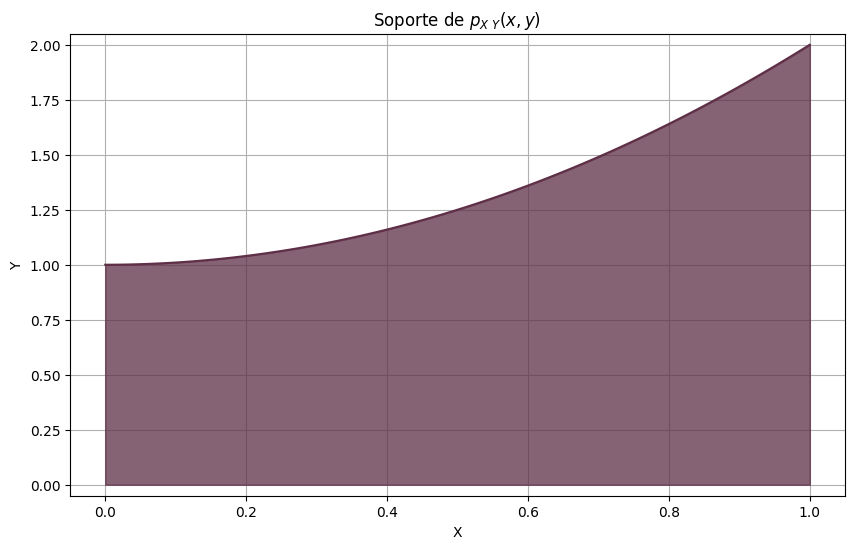

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 100)
y = x**2 + 1

plt.figure(figsize = (10, 6))
plt.plot(x, y, color='#5e2f46')
plt.fill_between(x, y, color='#5e2f46', alpha = 0.75, zorder = 2)

plt.ylim(-0.05, 2.05)
plt.xlim(-0.05, 1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Soporte de $p_{X ~ Y}(x, y)$')
plt.grid(zorder = 1)
plt.show()

&ensp; Ahora, observando esto, se puede analizar que la variable aleatoria condicional de $Y$ dado $X$ $(Y|X=x)$ sigue una distribución uniforme en el intervalo $y \in [0, ~ 1 + x^2]$. Esto se debe a que, para un valor fijo de $x$, $Y$ toma valores equiprobables dentro del intervalo limitado por la curva $y = 1 + x^2$. De esta forma, siguiendo la función de densidad de una uniforme, se tiene lo siguiente:

$$Y|X = x \sim U[0, ~ 1 + x^2] ~ \Longrightarrow ~ p_{Y | X = x}(y) = \frac{1}{1 + x^2} \cdot 𝟙\{ 0 < y < 1 + x^2\}$$

&ensp; A partir de esto y sabiendo que la esperanza de una variable aleatoria uniforme es el punto medio de su intervalo, se obtiene el resultado de lo buscado en este apartado.

$$E[Y|X=x] = \frac{1+x^2}{2}$$

**2. Calcular el error bayesiano.**

&ensp; En base a lo realizado anteriormente, se tiene la función de densidad de la condicionada. Dado que la densidad conjunta de $X$ e $Y$ se puede expresar como el producto de la densidad condicional por la densidad marginal de una de las variables, se obtiene el resultado que se ve a continuación.

$$ p_{X ~ Y} (x, ~ y) = p_{Y|X = x} (y) \cdot p_X (x) ~ \Longrightarrow ~ p_X(x) = \frac{p_{X ~ Y} (x, ~ y)}{p_{Y|X = x} (y)} $$

De esta manera, se puede determinar la densidad marginal de $X$.

$$ p_X(x) = \frac{p_{X ~ Y} (x, ~ y)}{p_{Y|X = x} (y)} ~ \Longrightarrow ~ p_X(x) = \frac{3}{4} (1 + x^2) \cdot 𝟙\{ 0 < x < 1\} $$

&ensp; Una vez obtenida la densidad marginal de $X$, se puede calcular el $k$-ésimo momento correspondiente a dicha variable aleatoria. Se debe recordar que el
$k$-ésimo momento se define como la esperanza de $X^k$, que se obtiene integrando el producto de esta función por su densidad:

$$ E[X^k] = \int x^k \cdot p_X (x) ~ dx = \int x^k \cdot \frac{3}{4} (1 + x^2) \cdot 𝟙\{ 0 < x < 1\} ~ dx = \int^1_0 x^k \cdot \frac{3}{4} (1 + x^2) ~ dx = \frac{3}{4} \left( \frac{1}{k + 1} + \frac{1}{k + 3}\right)$$

&ensp; También, como se mencionó anteriormente, es importante considerar que la variable aleatoria condicional sigue una distribución uniforme, tal que $Y|X=x \sim U[0, ~ 1 + x^2]$, por lo que, se puede calcular su varianza:

$$ Var(Y | X = x) = \frac{\left( 1 + x^2 \right)^2}{12} = \frac{1}{12} \left( 1+2x^2+x^4 \right) $$

&ensp; Finalmente, en función de los resultados y recordando que la esperanza condicional $E[Y|X]$ es el estimador óptimo que minimiza el error cuadrático medio, se calcula el el error bayesiano, es decir, el mínimo error que puede tener el problema. Este se define como la esperanza de la varianza de la variable condicionada. Por lo tanto, usando la linealidad del operador esperanza, se obtiene lo siguiente:

$$ E \left[ Var(Y | X = x) \right] = E \left[ \frac{1}{12} (1+2x^2+x^4) \right] = \frac{1}{12} \left( 1 + 2 E[X^2] + E[X^4] \right) = \frac{1}{12} \left( 1 + 2 \cdot \frac{2}{5} + \frac{9}{35} \right) $$

$$ \Rightarrow ~ E \left[ Var(Y | X = x) \right]= \frac{6}{35} \approx 0.171$$

**3. Calcular la recta de regresión.**

&ensp; En función de la expresión de la recta de regresión, se procede a calcular cada uno de sus términos.

$$ \hat{Y} = \frac{Cov(X, Y)}{\sigma_X^2} \cdot (X - E[X]) + E[Y]$$

&ensp; A partir de la expresión para los momentos de $X$ del inciso anterior, se calcula la esperanza de esta variable aleatoria.

$$ E[X] = \frac{9}{16} $$

&ensp; Luego, considerando la ley de esperanzas iteradas, algunos resultados de puntos anteriores y la linealidad del operador esperanza, se obtiene la esperanza de $Y$.

$$E[Y] = E \left[ E[Y | X] \right] = E \left[\frac{1 + X^2}{2} \right] = \frac{1}{2} \left( 1 + E[X^2] \right) = \frac{1}{2} \left( 1 + \frac{2}{5} \right)  $$

$$ \Longrightarrow E[Y] = \frac{7}{10} $$

&ensp; De esta manera, multiplicando ambos lados por la variable aleatoria $X$, pues tanto $E[Y]$ como $E \left[ E[Y | X] \right]$ no son esperanzas que dependen de $X$, se tiene la esperanza de $X \cdot Y$.

$$ E[X \cdot Y] = E \left[ X \cdot E[Y | X] \right] = E \left[ X \cdot \frac{1 + X^2}{2} \right] =  E \left[\frac{X + X^3}{2} \right] = \frac{1}{2} \left( E[X] + E[X^3] \right) = \frac{1}{2} \left( \frac{9}{16} + \frac{5}{16} \right) $$

$$ \Longrightarrow E[X \cdot Y] = \frac{7}{16} $$

&ensp; En base a estos dos resultados, se calcula la covarianza de $X$ e $Y$ y la varianza de $X$, siguiendo con propiedades de estos operadores.

$$ Cov(X, Y) = E[X \cdot Y] - E[X] \cdot E[Y] = \frac{7}{16} - \frac{9}{16} \cdot \frac{7}{10}$$

$$ \Longrightarrow Cov(X, Y) = \frac{7}{160} $$

$$ \sigma_X^2 = Var[X] =  E[X^2] - E^2[X] = \frac{2}{5} - \left( \frac{9}{16} \right)^2  $$

$$ \Longrightarrow  \sigma_X^2 = \frac{107}{1280}$$

&ensp; Por último, sustituyendo estos valores en la ecuación de la recta de regresión, se tiene lo que se visualiza a continuación.
$$ \hat{Y} = \frac{Cov(X, Y)}{\sigma_X^2} \cdot (X - E[X]) + E[Y] = \frac{\frac{7}{160}}{\frac{107}{1280}} \cdot \left( X - \frac{9}{16} \right) + \frac{7}{10} = \frac{56}{107} \cdot \left( X - \frac{9}{16} \right) + \frac{7}{10} $$
$$ \Rightarrow ~ \hat{Y} = \frac{56}{107} \cdot X + \frac{217}{535} \approx 0.523 \cdot X + 0.406$$

---

##### (B). *Simulación:*

**Utilizando $\texttt{random.uniform}$ (numpy), generar un dataset de 500 pares de muestras.**

&ensp; A fin de realizar una simulación con $500$ pares de muestras, se utilizó la función $\texttt{random.uniform}$ de la librería $\texttt{numpy}$. Esta función genera un punto $(x, y)$ dentro del rectangulo $(0, 0) \times (1, 2)$, lo que significa que algunas muestras pueden estar fuera del soporte deseado, el cual está definido por la condición $y = x^2 + 1$.

&ensp; De esta manera, para garantizar que solo se incluyan las muestras dentro de la región válida, al generar cada punto aleatorio el código evalúa si cumple la condición antes de agregarlo a la lista de muestras. Una vez obtenidos los $500$ pares válidos, la lista se convierte en un array de numpy para facilitar su manipulación.

In [ ]:
muestras = []

while len(muestras) < 500:
    muestra = np.random.uniform([0, 0], [1, 2])
    x_n, y_n = muestra[0], muestra[1]
    if y_n < x_n**2 + 1:
        muestras.append((x_n, y_n))

muestras = np.array(muestras)
print(muestras.shape)

(500, 2)


&ensp; Una vez generada la matriz de muestras con los puntos $(x, y)$ simulados, se grafica el soporte teórico con las $500$ muestras a fin de analizar que el dataset generado sea congruente con lo esperado teóricamente.

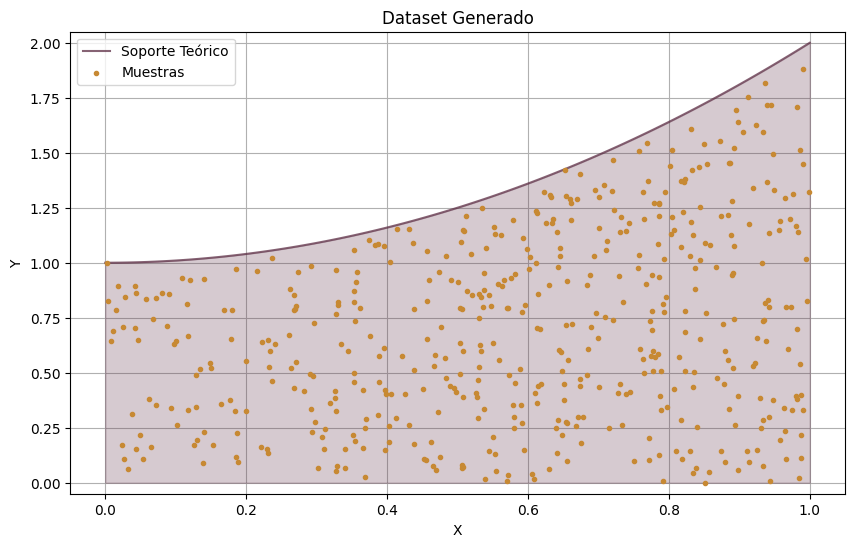

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(x, y, color = '#5e2f46', alpha = 0.75, label = 'Soporte Teórico')
plt.fill_between(x, y, color = '#5e2f46', alpha = 0.25, zorder = 2)
plt.scatter(muestras[:, 0], muestras[:, 1], color = '#c78933',  marker = '.', label = 'Muestras', zorder = 3)

plt.ylim(-0.05, 2.05)
plt.xlim(-0.05, 1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset Generado')
plt.grid(zorder=1)
plt.legend()
plt.show()

&ensp; Luego de analizar la figura, se puede concluir que los datos generados se encuentran dentro del soporte esperado en la teoría. Por lo tanto, el dataset obtenido a partir de la simulación tiene el comportamiento adecuado.

---

##### (C). *Regresión:*

**1. Implementar una regresión lineal (matricial) a partir de los datos generados previamente. El código debe estar estructurado de la siguiente manera:**

```python
class regresion_lineal:
    # Opcional, para inicializar atributos o declarar hiperparámetros
    def __init__(self,...

    # Etapa de entrenamiento
    def fit(self, X, y):

    # Etapa de testeo
    def predict(self, X):
```

**A su vez, debe poder extraer los atributos $\texttt{reglin.w}$ y $\texttt{reglin.b}$ una vez que el regresor fue entrenado.**

&ensp; Con el objetivo de estimar los parámetros mediante el método de estimación lineal, se implementa una clase denominada `regresion_lineal`, que cuenta con los siguientes métodos:

- `__init__:` Almacena el valor de los parámetros $b$ y $w$.

- `fit:` Ajusta el modelo al conjunto de datos proporcionado. Esto se logra a partir de lo siguiente:

    1. Se define la función de costo como el error cuadrático medio.
    $$ J = \frac{1}{n} \left| \left| X \cdot \mathbf{w} - Y \right| \right|^2 $$

    2. Se calcula el gradiente $\nabla J(\mathbf{w})$ y el Hessiano $H = \nabla^2 J(\mathbf{w})$ de la función costo $J$:
    $$ \nabla J(\mathbf{w}) = \frac{1}{n} (2 X^T X \mathbf{w} - 2 X^T y) $$
    $$H = \nabla^2 J(\mathbf{w}) = \frac{2}{n} X^T \cdot X$$

    3. El Hessiano es definido positivo, por ende, es convexo. Entonces, el mínimo global es:
    $$ \nabla J(\mathbf{w}) = 0 \Longrightarrow  \frac{1}{n} (2 X^T X \mathbf{w} - 2 X^T y) = 0 $$

    4. De esta manera, siguiendo el método de la pseudo inversa, se obtiene la siguiente expresión para los coeficientes:

    $$ \mathbf{w} = [b ~~ w]^T = \left( X^T X \right)^{-1} \cdot X^T \cdot y$$

- `predict:` Realiza predicciones para nuevas entradas una vez que la regresión lineal ha sido entrenada. Utiliza los coeficientes obtenidos en la fase de entrenamiento para estimar los valores de salida correspondientes a los datos de entrada, según la ecuación de la recta de regresión: $$ \hat{y} = w^T \cdot X + b $$

- `params:` Permite acceder a los coeficientes $w$ y $b$ del modelo ya entrenado.

In [ ]:
class regresion_lineal:
    # Opcional, para inicializar atributos o declarar hiperparámetros
    def __init__(self):
        self.w = None
        self.b = None

    # Etapa de entrenamiento
    def fit(self, X, y):
        aux = np.ones((X.shape[0], 1))
        X = np.c_[aux, X]

        W = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ y
        self.b = W[0, 0]
        self.w = W[1, 0]

    # Etapa de testeo
    def predict(self, X):
        return X * self.w + self.b

    # Obtener los parámetros w y b
    def params(self):
        return self.w, self.b

**2. Entrenar la regresión lineal con el dataset generado anteriormente.**

 &ensp; Basándose en lo realizado en el apartado anterior, se procede a entrenar la regresión lineal. Para ello, primero se inicializa la clase `regresion_lineal` y, posteriormente, se utiliza el método `fit`, que lleva a cabo la etapa de entrenamiento a partir del dataset generado en el apartado **(B)**. Es importante destacar que $X$ e $y$ se transformaron a vectores columna de dimensión $500 \times 1$. Esto se debe a que `fit` realiza cálculos matriciales y asume  que tanto $X$ como $y$ son pasados como vectores columna.

In [ ]:
from IPython.display import display, Latex

X_data = muestras[:, 0].reshape(-1, 1) # Transformo a un vector columnas
y_data = muestras[:, 1].reshape(-1, 1) # Transformo a un vector columnas

RL = regresion_lineal()
RL.fit(X_data, y_data)
w_rl, b_rl = RL.params()

display(Latex(f'$W = \\begin{{bmatrix}} w_{{rl}} \\\\ b_{{rl}} \\end{{bmatrix}} \\approx \\begin{{bmatrix}} {w_rl:.3f} \\\\ {b_rl:.3f} \\end{{bmatrix}}$'))

<IPython.core.display.Latex object>

&ensp; Una vez obtenidos los valores tanto de $b_{rl}$ como de $w_{rl}$, se los compara con los valores hallados a partir de los cálculos teóricos. De esta forma, se evalúa la precisión del modelo frente a los valores esperados a partir del error relativo, cuya expresión es la siguiente: $$ \epsilon_r ~ \%= \frac{|\text{Valor Teórico} - \text{Valor Estimado}|}{\text{Valor Teórico}} \cdot 100$$

In [ ]:
w_teo = 0.523
b_teo = 0.406

rel_error_w_rl = np.abs(w_rl - w_teo) / w_teo * 100
rel_error_b_rl = np.abs(b_rl - b_teo) / b_teo * 100

display(Latex(f'$\epsilon_{{r}} = \\frac{{|w_{{teo}} - w_{{rl}}|}}{{w_{{teo}}}} \\approx {rel_error_w_rl:.2f} ~ \\%$'))
display(Latex(f'$\epsilon_{{r}} = \\frac{{|b_{{teo}} - b_{{rl}}|}}{{b_{{teo}}}} \\approx {rel_error_b_rl:.2f} ~ \\%$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

&ensp; Si bien los resultados pueden variar según las muestras simuladas en cada caso, se observa que, en la mayoría de las ocasiones, los errores relativos se mantienen en el orden del $10 \%$. Esto permite concluir que la recta obtenida mediante la regresión lineal simulada es consistente con el desarrollo teórico, validando así el método empleado.

**3. Utilizar el regresor para predecir la duración de una batería de 256 GB.**

&ensp; Ahora, teniendo en cuenta que la regresión lineal ya fue entrenada con el dataset generado, se utiliza el método `predict` para estimar la duración de la bateria de un smartphone de $256 ~ GB = 0.256 ~ TB$ de capacidad de almacenamiento.

In [ ]:
y_rl_256 = RL.predict(0.256)
display(Latex(f'$\hat{{y}} = w_{{rl}} \\cdot 0.256 + b_{{rl}} \\approx {y_rl_256:.3f}$'))

<IPython.core.display.Latex object>

---

#### (D). *Comparación:*

**Graficar en una misma figura ($\texttt{pyplot}$) el soporte, la esperanza condicional, la recta de regresión (teórica) y la regresión lineal hallada.**

&ensp; En función de lo desarrollado en la sección anterior, se procede a graficar con las funciones propias de la librería `matplotlib`. Con este fin, se declaran las expresiones de la recta de regresión teórica, la hallada a partir de los datos y la esperanza condicional. Cabe destacar que $x$ fue definida anteriormente como un array de $100$ valores entre $0$ y $1$.

In [ ]:
y_hat_teo = w_teo * x + b_teo
y_hat_rl = w_rl * x + b_rl
E_condicional = (1 + x**2) / 2

&ensp; De esta forma, se grafica el diagrama comparativo con cada una de las curvas solicitadas por la cátedra en la consigna.

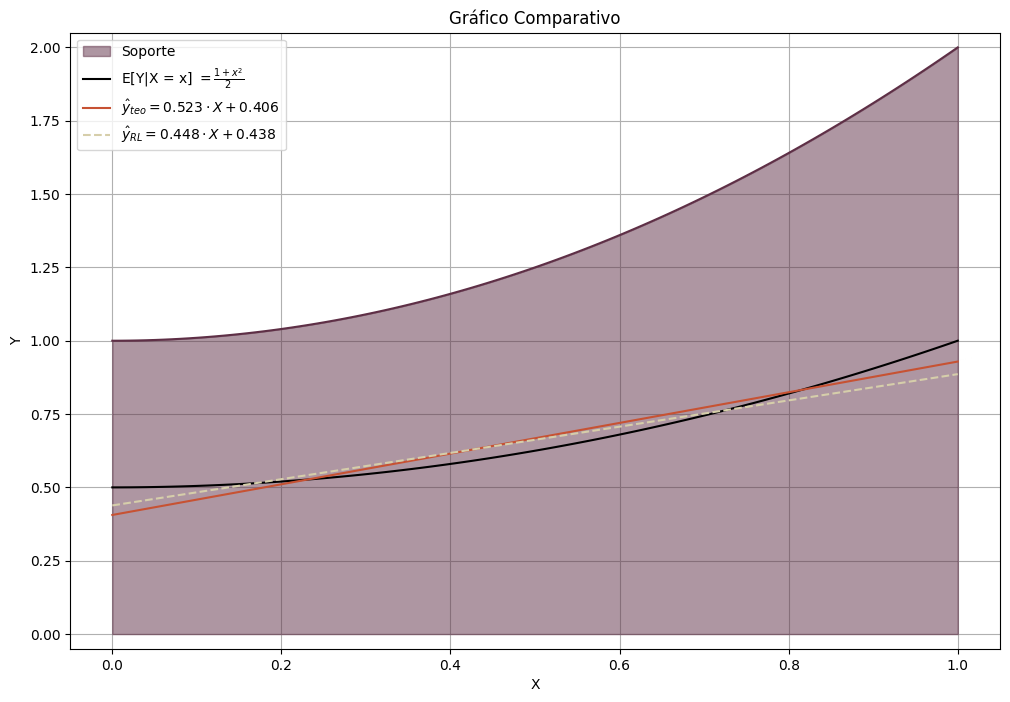

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(x, y, color = '#5e2f46')
plt.fill_between(x, y, color = '#5e2f46', alpha=0.5, label = 'Soporte', zorder = 2)
plt.plot(x, E_condicional, color = '#000000', label = f'E[Y|X = x] $= \\frac{{1 + x^2}}{{2}}$')
plt.plot(x, y_hat_teo, color = '#c75233', label = f'$\hat{{y}}_{{teo}} =  {w_teo:.3f} \cdot X + {b_teo:.3f}$')
plt.plot(x, y_hat_rl, color = '#d6ceaa', label = f'$\hat{{y}}_{{RL}} =  {w_rl:.3f} \cdot X + {b_rl:.3f}$', linestyle = '--', linewidth = 1.5)

plt.ylim(-0.05, 2.05)
plt.xlim(-0.05, 1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico Comparativo')
plt.grid(zorder = 1)
plt.legend()
plt.show()

&ensp; Al igual que en el análisis de los errores relativos entre los valores simulados y los teóricos del modelo, se observa claramente cómo la recta teórica y la simulada presentan una tendencia similar. Además, la regresión lineal y la esperanza condicional exhiben un comportamiento coherente, aunque difieren en su naturaleza: mientras que la regresión sigue una relación lineal, la esperanza condicional presenta una dependencia cuadrática con $X$. A pesar de esto, la dispersión de los valores en ambos casos se mantiene consistente, lo que refuerza la validez del procedimiento realizado, dado que, la esperanza condicional es el estimador óptimo en este contexto.

---

#### (E). *Gradiente descendente:*

**Repetir el inciso (C) utilizando gradiente descendente.**

**1. Implementar un gradiente descendente a partir de los datos generados previamente. El código debe estar estructurado de la siguiente manera:**

```python
class gradiente_descendente:
    # Opcional, para inicializar atributos o declarar hiperparámetros
    def __init__(self,...

    # Etapa de entrenamiento
    def fit(self, X, y):

    # Etapa de testeo
    def predict(self, X):
```

**A su vez, debe poder extraer los atributos $\texttt{reglin.w}$ y $\texttt{reglin.b}$ una vez que el regresor fue entrenado.**

&ensp;  Procediendo de manera análoga a la estimación lineal, se implementa la clase llamada `gradiente_descendente`, diseñada para estimar los parámetros de un modelo mediante el método del gradiente descendente. Esta clase cuenta con los siguientes métodos:

- `__init__:` Almacena el valor de los parámetros $b$, $w$ y la cantidad de iteraciones. Además, se le pasa la tasa de aprendizaje $\alpha$.

- `fit:` Ajusta el modelo al conjunto de datos proporcionado mediante lo siguiente:

    1. Se define la función de costo como el error cuadrático medio.
    $$ J = \frac{1}{n} \left| \left| X \cdot \mathbf{w} - Y \right| \right|^2 $$

    2. Se calcula el gradiente $\nabla J(\mathbf{w})$ y el Hessiano $H = \nabla^2 J(\mathbf{w})$ de la función costo $J$:
    $$ \nabla J(\mathbf{w}) = \frac{1}{n} (2 X^T X \mathbf{w} - 2 X^T y) $$
    $$H = \nabla^2 J(\mathbf{w}) = \frac{2}{n} X^T \cdot X$$
    
    3. Entonces, reemplazando en la expresión recursiva del gradiente descendiente se obtiene lo siguiente:
$$ \mathbf{w}_{t+1} = \mathbf{w}_t - \alpha \cdot \nabla J(\mathbf{w}_t) $$
$$ \Longrightarrow  \mathbf{w}_{t+1} = \mathbf{w}_t - \alpha \cdot \frac{1}{n} (2 X^T X \mathbf{w_t} - 2 X^T y) $$

- `predict:` Realiza predicciones para nuevas entradas una vez que el gradiente descendiente ha sido entrenado. Utiliza los coeficientes obtenidos en la fase de entrenamiento para estimar los valores de salida correspondientes a los datos de entrada, según la ecuación de la recta de regresión: $$ \hat{y} = w^T \cdot X + b $$

- `params:` Permite acceder a los coeficientes $w$, $b$ y $\alpha$ del modelo ya entrenado. Además de la cantidad de iteraciones realizadas.

In [ ]:
class gradiente_descendente:
    # Opcional, para inicializar atributos o declarar hiperparámetros
    def __init__(self, alpha):
        self.w = None
        self.b = None
        self.alpha = alpha
        self.iteraciones = 0

    # Etapa de entrenamiento
    def fit(self, X, y):
        aux = np.ones((X.shape[0], 1))
        X = np.c_[aux, X]

        W = np.zeros((np.transpose(X) @ y).shape)
        while True:
            self.iteraciones = self.iteraciones + 1
            W_nuevo = W - self.alpha * (1 / X.shape[0]) * (2 * np.transpose(X) @ X @ W - 2 * np.transpose(X) @ y)
            if (np.abs(W_nuevo[0] - W[0]) < 1e-6 and np.abs(W_nuevo[1] - W[1]) < 1e-6):
                W = W_nuevo
                break
            W = W_nuevo

        self.b = W[0, 0]
        self.w = W[1, 0]

    # Etapa de testeo
    def predict(self, X):
        return X * self.w + self.b

    # Obtener los parámetros w, b, alpha y la cantidad de iteraciones
    def params(self):
        return self.w, self.b, self.alpha, self.iteraciones

**2. Entrenar el gradiente descendente con el dataset generado anteriormente.**

&ensp; Al igual que lo ya realizado para la estimación lineal, se inicializa la clase `gradiente_descendente` y se lo entrena a fin de obtener los parámetros $b$ y $w$.

&ensp; Además, se debe tener en cuenta que se hará el entrenamiento con diferentes valores arbitrarios para la tasa de aprendizaje, cuya separación será logarítmica. Luego, también se entrenará con el $\alpha^*$, es decir, la tasa de aprendizaje óptima. Esta se determina a partir de la descomposición en valores espectrales del Hessiano: $$ \alpha^* = \frac{2}{\lambda_{max} + \lambda_{min}}$$

&ensp; Para esto último se realiza la siguiente función, a fin de mejorar la legibilidad el código.

In [ ]:
def calcular_alpha_optimo(X_data):
    aux = np.ones((X_data.shape[0], 1))
    X_matriz = np.c_[aux, X_data]

    hessiano = (2 / X_matriz.shape[0]) * np.transpose(X_matriz) @ X_matriz
    L, Q = np.linalg.eig(hessiano)

    return 2 / (np.max(L) + np.min(L))

&ensp; De esta manera, se procede obteniendo los siguientes resultados.

In [ ]:
alpha_optimo = calcular_alpha_optimo(X_data)
alphas_it = [0.001, 0.01, 0.1, 0.7, alpha_optimo]

for alpha in alphas_it:
    GD = gradiente_descendente(alpha)
    GD.fit(X_data, y_data)
    w_gd, b_gd, alpha, iteraciones = GD.params()

    J = (1 / X_data.shape[0]) * np.sum((y_data - (X_data * w_gd+ b_gd))**2)
    if(alpha == alpha_optimo):
        display(Latex(f'$\\alpha^* = \\frac{{2}}{{\\lambda_{{max}} + \\lambda_{{min}}}} \\approx {alpha_optimo:.3f} \\Longrightarrow  W = \\begin{{bmatrix}} w_{{gd}} \\\\ b_{{gd}} \\end{{bmatrix}} \\approx \\begin{{bmatrix}} {w_gd:.3f} \\\\ {b_gd:.3f} \\end{{bmatrix}}$'))
        display(Latex(f'$ \\text{{Iteraciones: }} {iteraciones}, ~ J = \\frac{{1}}{{n}} || X \\cdot w - y||^2 \\approx {J:.3f}$'))
    else:
        display(Latex(f'$\\alpha = {alpha} \Longrightarrow W = \\begin{{bmatrix}} w_{{gd}} \\\\ b_{{gd}} \\end{{bmatrix}} \\approx \\begin{{bmatrix}} {w_gd:.3f} \\\\ {b_gd:.3f} \\end{{bmatrix}}$'))
        display(Latex(f'$\\text{{Iteraciones: }} {iteraciones}, ~ J = \\frac{{1}}{{n}} || X \\cdot w - y||^2 \\approx {J:.3f}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

&ensp; Claramente se ve que mientras más cerca se encuentre el valor de la tasa de aprendizaje del valor óptimo, habrá menor cantidad de iteraciones. De igual manera, los resultados mostrados en pantalla demuestran que el valor de $\alpha = 0.7$ realiza menos iteraciones para converger al valor de $\mathbf{w}$.

&ensp; Más allá de esto, los valores que se guardaron en las variables `w_gd` y `b_gd` son esencialmente iguales indistintamente si el valor de $\alpha$ sea el optimo o este que lo mejora. Por lo tanto, se utilizarán los valores obtenidos a partir del entrenamiento con la tasa de aprendizaje óptima.

&ensp; Análogamente a lo ya realizado para la regresión lineal, se calcula el error relativo entre los valores simulados y los teóricos.

In [ ]:
w_teo = 0.523
b_teo = 0.406

rel_error_w_gd = np.abs(w_gd - w_teo) / w_teo * 100
rel_error_b_gd = np.abs(b_gd - b_teo) / b_teo * 100

display(Latex(f'$\epsilon_{{r}} = \\frac{{|w_{{teo}} - w_{{gd}}|}}{{w_{{teo}}}} \\approx {rel_error_w_gd:.2f} ~ \\%$'))
display(Latex(f'$\epsilon_{{r}} = \\frac{{|b_{{teo}} - b_{{gd}}|}}{{b_{{teo}}}} \\approx {rel_error_b_gd:.2f} ~ \\%$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

&ensp; De esta forma, se puede analizar claramente que, independientemente del método empleado, ya sea regresión lineal o gradiente descendente, se obtienen resultados equivalentes. En ambos casos, la dispersión respecto a los valores teóricos se mantiene en torno al $10~ \%$, lo que valida la consistencia de la metodología utilizada. Además, esto infiere que el gradiente descendente, a pesar de ser un método iterativo, logra converger hacia la solución determinada analíticamente por la regresión lineal.

&ensp; La correspondencia entre métodos se puede ver claramente en el siguiente gráfico.

In [ ]:
y_hat_gd = w_gd * x + b_gd

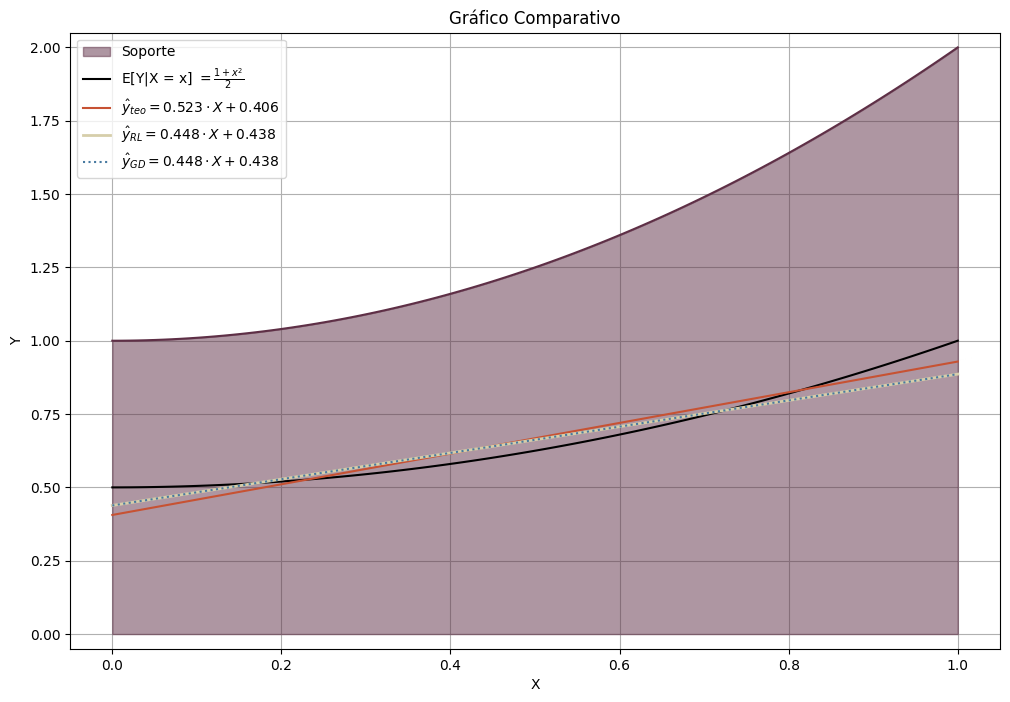

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(x, y, color = '#5e2f46')
plt.fill_between(x, y, color = '#5e2f46', alpha=0.5, label = 'Soporte', zorder = 2)
plt.plot(x, E_condicional, color = '#000000', label = f'E[Y|X = x] $= \\frac{{1 + x^2}}{{2}}$')
plt.plot(x, y_hat_teo, color = '#c75233', label = f'$\hat{{y}}_{{teo}} =  {w_teo:.3f} \cdot X + {b_teo:.3f}$')
plt.plot(x, y_hat_rl, color = '#d6ceaa', label = f'$\hat{{y}}_{{RL}} =  {w_rl:.3f} \cdot X + {b_rl:.3f}$', linewidth = 2)
plt.plot(x, y_hat_gd, color = '#487aa1', label = f'$\hat{{y}}_{{GD}} =  {w_gd:.3f} \cdot X + {b_gd:.3f}$', linestyle = ':')

plt.ylim(-0.05, 2.05)
plt.xlim(-0.05, 1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico Comparativo')
plt.grid(zorder = 1)
plt.legend()
plt.show()

**3. Utilizar el regresor para predecir la duración de una batería de 256 GB.**

&ensp; Una vez que el gradiente descendente fue entrenado con el dataset generado, se utiliza el método `predict` para estimar la duración de la bateria de un smartphone de $256 ~ GB = 0.256 ~ TB$ de capacidad de almacenamiento.

In [ ]:
y_gd_256 = GD.predict(0.256)
display(Latex(f'$\hat{{y}} = w_{{gd}} \\cdot 0.256 + b_{{gd}} \\approx {y_gd_256:.3f}$'))

<IPython.core.display.Latex object>

---
---

### <center> **Conclusiones**

&ensp; En función de lo desarrollado en este informe, se lograron implementar y comparar los métodos de la regresión lineal y el gradiente descendente, evaluando su capacidad para estimar relaciones entre variables. El análisis permitió destacar la importancia de ambos enfoques según el tipo de resolución adoptada: analítica o iterativa.

&ensp; Asimismo, se contrastaron los resultados teóricos con las simulaciones, validando la coherencia entre ambos. Al realizar esta comparación, se observó que los errores relativos entre los métodos y los valores esperados rondan el $10 ~ %$ en la mayoría de las simulaciones, lo que indica que el modelo refleja adecuadamente el comportamiento teórico. Además, el análisis de los coeficientes de la recta de regresión evidenció que no existen diferencias significativas entre los métodos empleados, ya que los valores obtenidos fueron altamente similares, lo que sugiere una equivalencia entre ambos enfoques.

&ensp; Finalmente, este trabajo permitió profundizar en la implementación de algoritmos de regresión en Python y en el uso de programación orientada a objetos mediante clases y métodos.